# 2. Plant Set Analysis Visualization For Time Series Reescaling

In this notebook we'll work with the visualization of the analysis performed on a plant set in order to get a sense of the best parametes conditions for our particular reescaling purpose. We'll refer to a `Plant Set` as a set of plant locations and their information. They're expected to be around a certain region.

In [1]:
from modules import plant_scaling
from modules import data_preparation
from modules import geographical_plotting
from modules import geographical_analysis

#### 2.1 Full Plant Set Clustered GeoDataFrames
First, we'll repeat some of the steps on `1_PlantsVisualisation.ipynb` to generate the GeoDataFrames with the spatial information on the plants distribution as well as the labels obtained from the clustering.

In [2]:
#Plant files metadata
meta_UPV, meta_DPV = data_preparation.get_plants_files_metadata( read = True, PATH = './data/Extracted/', UPV = True, DPV = True, to_csv = False)

#construction of geo_dataframes
geo_df_UPV = geographical_plotting.geographic_data(meta_UPV)
geo_df_DPV = geographical_plotting.geographic_data(meta_DPV)

#clustering
geo_df_UPV_labeled, centers_df_UPV = geographical_analysis.geographical_plant_clustering(geo_df_UPV, N_clusters = 115 )
geo_df_DPV_labeled, centers_df_DPV = geographical_analysis.geographical_plant_clustering(geo_df_DPV, N_clusters = 115 )

#### 2.2 Closest Cluster Centroid
We perform calculations to determine the centroid wich is closer to our coordinate point of interest.

In [3]:
index_UPV, center_long_UPV, center_lat_UPV = geographical_analysis.closest_centroid( geo_df_UPV_labeled, centers_df_UPV, coords = (-120.00, 35.00))
index_DPV, center_long_DPV, center_lat_DPV = geographical_analysis.closest_centroid( geo_df_DPV_labeled, centers_df_DPV, coords = (-120.00, 35.00))

#### 2.3 Cluster Group Filtering
We now filter from the full Plant Set metadata list the group with the label that is most of our interest.
That would be the group which centroid is closest to the coordinate point which we before specified.

In [4]:
cluster_group_metadata_df_UPV = geographical_analysis.cluster_group(index_UPV, geo_df_UPV_labeled)
cluster_group_metadata_df_DPV = geographical_analysis.cluster_group(index_DPV, geo_df_DPV_labeled)

This will get us the filtered DataFrame with the metadata that we'll actually use. the plants which belong to this subgroup, form the `Plant Set` discussed before.

From the segmentation procedure we got `cluster_group_metadata_df_UPV.shape[0]` plants filtered, which means they are relatively close to the point of interest.

In [5]:
cluster_group_metadata_df_UPV.shape

(14, 7)

#### 2.4 Plant Sets Object Creation 
Now we'll create two objects, each with the particular metadata on the dataframes from above. The class already has all the required functions to read the time series held in the files specified on the metadata dataframes.

In [6]:
datapath = './data/Extracted/'
UPV_plant_set = plant_scaling.Plant_set(datapath, cluster_group_metadata_df_UPV, coords = (-120.00, 35.00) )
DPV_plant_set = plant_scaling.Plant_set(datapath, cluster_group_metadata_df_DPV, coords = (-120.00, 35.00) )

##### Disclaimer: 
Please do take into account that the less `N_clusters`that we use, the longer it will take to read the data for any object because there will be more time series to process. At the same time, the more `N_clusters` we use, the more it will take on clustering the coordinate points. Therefore, a right balance between the clustering time and the `read_data` time must be found. It is also recomended to just rund the segmentation procedure once and with the labeled dataframe, filter the plants with a particular coordinate point.

### 2.5 Plant Set Analysis
The following procedure illustrate the use of the different methods implemented on the Solar_plants_data class in order to develop some intuition on how the parameters of the plant-power-generation-timeseries-reescaling works. We'll perform it only on the UPV filtered Plant Set, but the procedure can be implemented on any Plant Set.

After the objects are created, the files on the metadata dataframes are read. We then collect on an array the total installed power of the plant and the daily registered power exactly at midday for each of the N plants which got segmented. You can specify either a dataframe or a path where a `Plant_Set_metadata.csv` file should be held. If `set_points = True` , the array of points is saved as a attribute of the object overwritting anything that would be in its place.

In [7]:
UPV_plant_set.points = UPV_plant_set.read_data(geo_data_XPV_labeled = UPV_plant_set.plants_metadata, set_points = True)

What the following 3 functions do is pretty self-explanatory from their name but anyway we'll get through it:
- `Plant_set.midday_distributions(create_csv=False, plot=True)` plots the distribution of points constructed from the time series specified on the metadata dataframe. It returns a dataframe.

,MW,Power_Midday
0,100.0,3.2
1,100.0,10.2
2,100.0,62.0
3,100.0,44.0
4,100.0,65.6
...,...,...
5105,149.0,20.7
5106,149.0,95.0
5107,149.0,88.5
5108,149.0,94.2


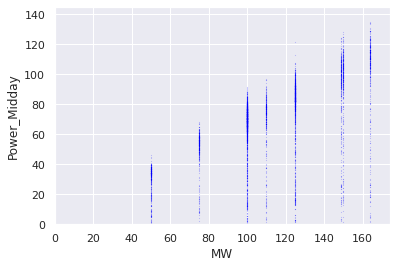

In [8]:
UPV_plant_set.midday_distributions(create_csv=False, plot=True)

- `Plant_set.yearly_mean_value(self, create_csv = False, plot = False)` instead of plotting the whole miday-points distribution, takes the mean value, returns a dataframe and (if specified) plots it and creates a csv file from the data.

,MW,Mean_Power_Midday
0,100.0,63.725205
1,125.0,74.925205
2,150.0,90.292877
3,50.0,28.463288
4,100.0,59.793699
5,164.0,95.378630
6,110.0,66.193151
7,125.0,71.000822
8,125.0,77.103014
9,75.0,49.134521


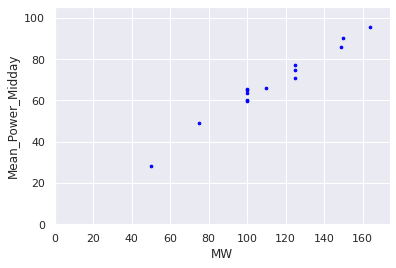

In [9]:
UPV_plant_set.yearly_mean_value(create_csv = False, plot = True)

- `Plant_set.yearly_max_value(self, create_csv = False, plot = False)` does the same as `yearly_mean_value`but instead takes the max value.

,MW,Max_Power_Midday
0,100.0,88.0
1,125.0,113.1
2,150.0,128.1
3,50.0,46.1
4,100.0,87.5
5,164.0,135.0
6,110.0,96.7
7,125.0,107.5
8,125.0,121.6
9,75.0,68.4


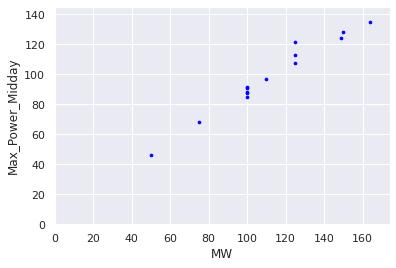

In [10]:
UPV_plant_set.yearly_max_value(create_csv = False, plot = True)

In order to determine how we'll reescale the signal, we use `Plant_set.fit_curve(degree = 2, data = 'max', plot = False, scale_factor = None)`, which fits a polinomial of degree `[1,2,3]` to the specified data `['max','mean','all']`. It returns polinomial's coeficients or the scaling factor if `scale_factor = True`.

0.7809986707909234

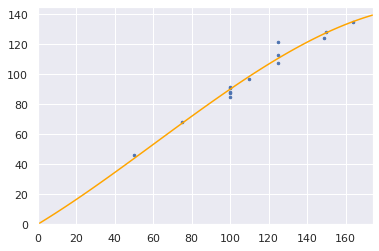

In [11]:
UPV_plant_set.fit_curve(degree = 3 , data = 'max', plot = True, scale_factor = True)

### 2.6 Signal Reescaling
Finally we select a power time series from a random plant of the Plant Set and reescaling according to the parameters specified on `Plant_scale.scale_signal(degree, data, MW_out, write_csv = True, plot_hist = False)`. It returns the time series, and if specified, plots a histogram in order to confirm that the scalling procedure has been donde correctly.

LocalTime
2006-01-01 00:00:00    0.0
2006-01-01 00:05:00    0.0
2006-01-01 00:10:00    0.0
2006-01-01 00:15:00    0.0
2006-01-01 00:20:00    0.0
                      ... 
2006-12-31 23:35:00    0.0
2006-12-31 23:40:00    0.0
2006-12-31 23:45:00    0.0
2006-12-31 23:50:00    0.0
2006-12-31 23:55:00    0.0
Name: Power(MW), Length: 105120, dtype: float64

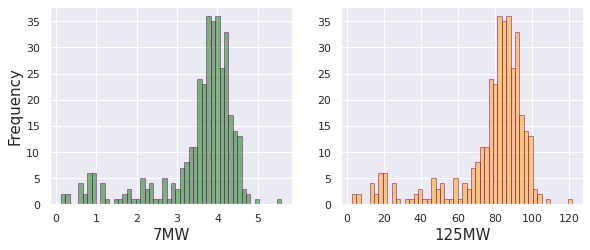

In [12]:
UPV_plant_set.scale_signal(degree=3, data='max', MW_out=7, plot_hist=True)

The output file will have a name such as `Scaled_34.85_-119.85_35.0_-120.0_2006_UPV_100MW_5_Min_3deg_max_7MW.csv`, where `Scaled` means that the time series comes from a reescaling procedure, the first coordinate set `34.85_-119.85` comes from the reescaled plant location, the second coordinate set `35.0_-120.0` corrisponds to the desired location for the simulated plant, then `2006` the corresponding year climatic fluctuations, `UPV` the selected type of technology, `100MW` indicates that the reescaled plant originally was from 100MW peak power. Then the time resolution with `5_min`, then `3deg` the degree of the polinome used to extrapolate, `max` refers to the data which the polinomial was adjusted to, and finally `7MW`corrisponds to the reescaled peak power. It will be written in the `./reescaled_series/` folder

-----